# A/B Testing
In A/B testing, we analyze the results of two marketing strategies to choose the best one for future marketing campaigns. For example, when I started an ad campaign on Instagram to promote my Instagram post for the very first time, my target audience was different from the target audience of my second ad campaign. After analyzing the results of both ad campaigns, I always preferred the audience of the second ad campaign as it gave better reach and followers than the first one.

That is what A/B testing means. Your goal can be to boost sales, followers, or traffic, but when we choose the best marketing strategy according to the results of our previous marketing campaigns, it is nothing but A/B testing.

In [2]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

control_data = pd.read_csv("control.csv", sep = ";")
test_data = pd.read_csv("test data.csv", sep = ";")

# Let’s have a look at both datasets:



In [3]:
print(control_data.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [4]:
print(test_data.head())

   Campaign Name       Date  Spend [USD]  # of Impressions  Reach  \
0  Test Campaign  1.08.2019         3008             39550  35820   
1  Test Campaign  2.08.2019         2542            100719  91236   
2  Test Campaign  3.08.2019         2365             70263  45198   
3  Test Campaign  4.08.2019         2710             78451  25937   
4  Test Campaign  5.08.2019         2297            114295  95138   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0                 3038           1946               1069               894   
1                 4657           2359               1548               879   
2                 7885           2572               2367              1268   
3                 4216           2216               1437               566   
4                 5863           2106                858               956   

   # of Purchase  
0            255  
1            677  
2            578  
3            340  
4            768  


# Data Preparation
The datasets have some errors in column names. Let’s give new column names before moving forward:

In [5]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

# Now let’s see if the datasets have null values or not:

In [6]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [7]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


# The dataset of the control campaign has missing values in a row. Let’s fill in these missing values by the mean value of each column:

In [8]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), 
                                             inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(), 
                             inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), 
                                      inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), 
                                         inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), 
                                      inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), 
                                     inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), 
                                 inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33808\423760346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(),
C:\Users\HP\AppData\Local\Temp\ipykernel_33808\423760346.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

# Now I will create a new dataset by merging both datasets:

In [9]:
ab_data = control_data.merge(test_data, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head())

      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2  Control Campaign  10.08.2019          2149               117624.0  91257.0   
3     Test Campaign  10.08.2019          2790                95054.0  79632.0   
4  Control Campaign  11.08.2019          2490               115247.0  95843.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          2277.0             2475.0          1984.0         1629.0      734.0  
3          8125.0             2312.0          1804.0          424.0      275.0  
4          8137.0             2941.0          2486.0         1887.0      475.0  


C:\Users\HP\AppData\Local\Temp\ipykernel_33808\3418761701.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data,


# Before moving forward, let’s have a look if the dataset has an equal number of samples about both campaigns:

In [10]:
print(ab_data["Campaign Name"].value_counts())

Campaign Name
Control Campaign    30
Test Campaign       30
Name: count, dtype: int64


# The dataset has 30 samples for each campaign. Now let’s start with A/B testing to find the best marketing strategy.

# A/B Testing to Find the Best Marketing Strategy
To get started with A/B testing, I will first analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:

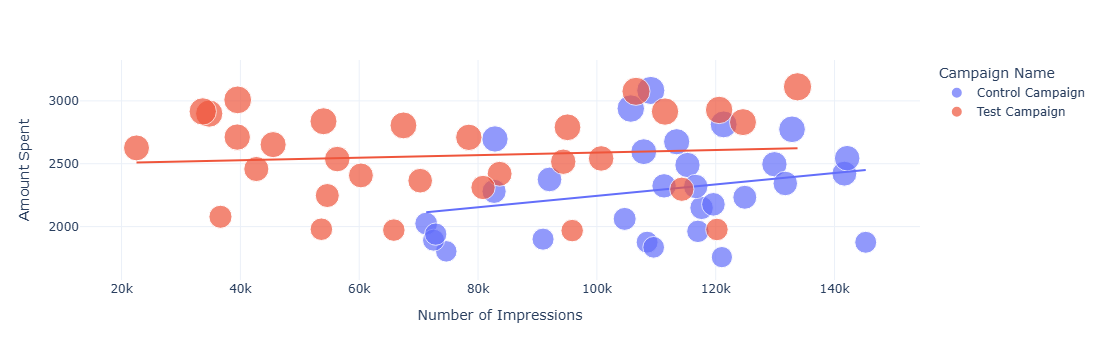

In [12]:
figure = px.scatter(data_frame = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

# The control campaign resulted in more impressions according to the amount spent on both campaigns. Now let’s have a look at the number of searches performed on the website from both campaigns:

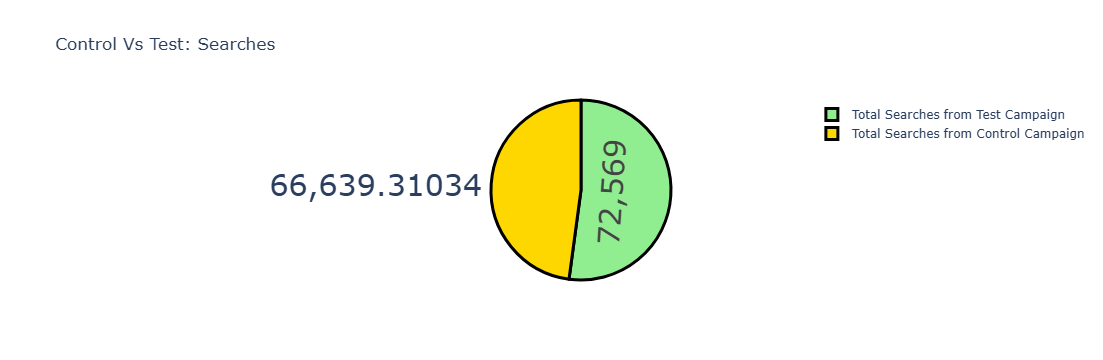

In [14]:
label = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]), 
          sum(test_data["Searches Received"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Searches')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# The test campaign resulted in more searches on the website. Now let’s have a look at the number of website clicks from both campaigns:

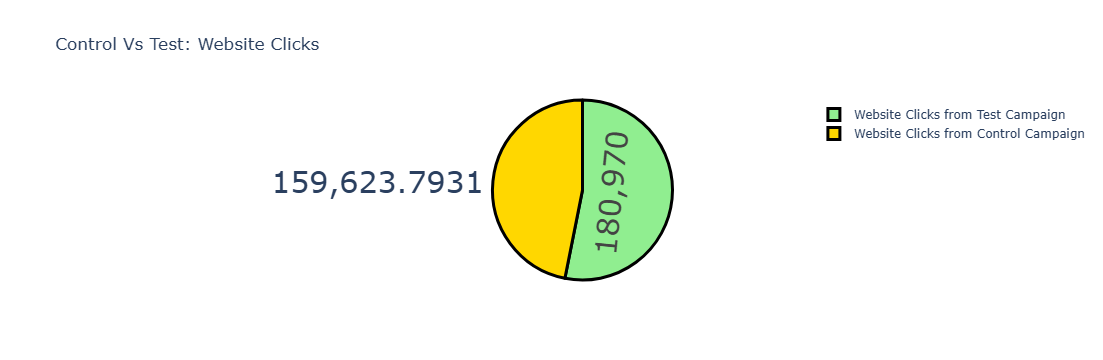

In [15]:
label = ["Website Clicks from Control Campaign", 
         "Website Clicks from Test Campaign"]
counts = [sum(control_data["Website Clicks"]), 
          sum(test_data["Website Clicks"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Website Clicks')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# The test campaign wins in the number of website clicks. Now let’s have a look at the amount of content viewed after reaching the website from both campaigns:

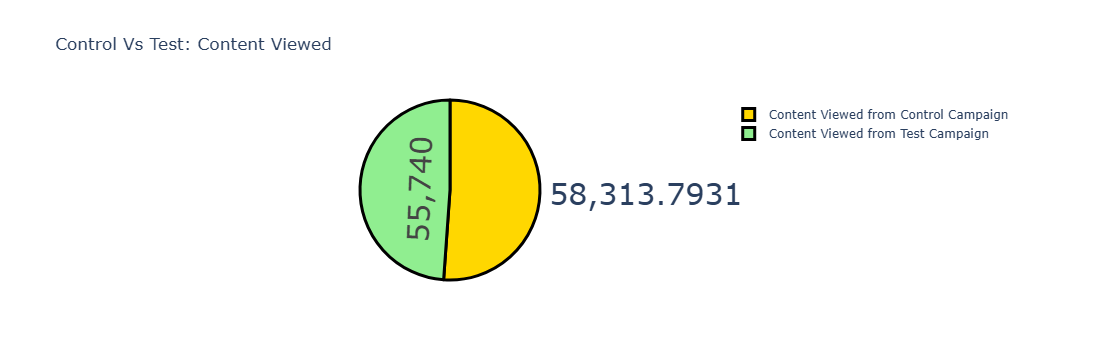

In [16]:
label = ["Content Viewed from Control Campaign", 
         "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]), 
          sum(test_data["Content Viewed"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content Viewed')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# The audience of the control campaign viewed more content than the test campaign. Although there is not much difference, as the website clicks of the control campaign were low, its engagement on the website is higher than the test campaign.

# Now let’s have a look at the number of products added to the cart from both campaigns:



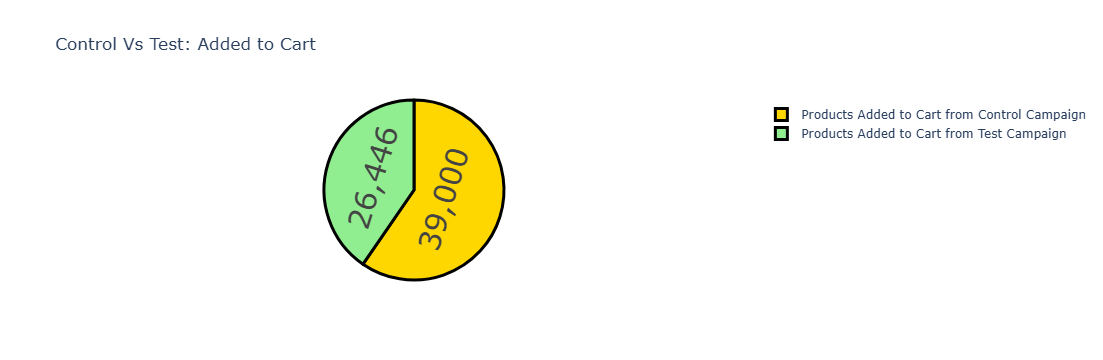

In [17]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Added to Cart')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# Despite low website clicks more products were added to the cart from the control campaign. Now let’s have a look at the amount spent on both campaigns:

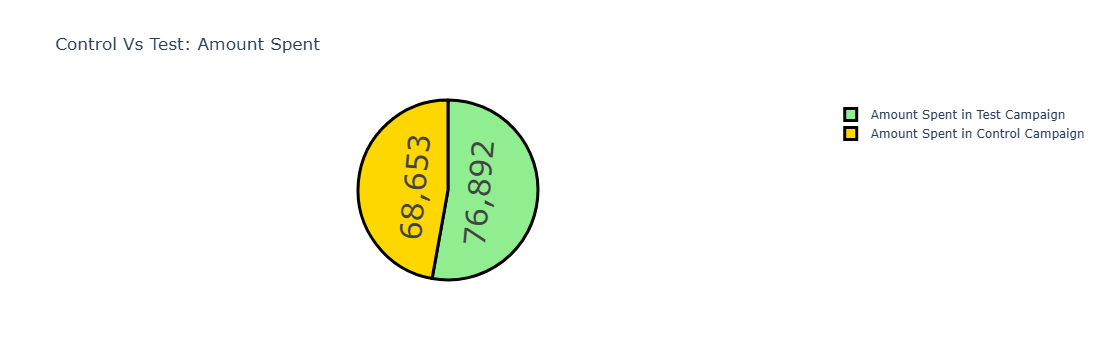

In [18]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# The amount spent on the test campaign is higher than the control campaign. But as we can see that the control campaign resulted in more content views and more products in the cart, the control campaign is more efficient than the test campaign.

# Now let’s have a look at the purchases made by both campaigns:

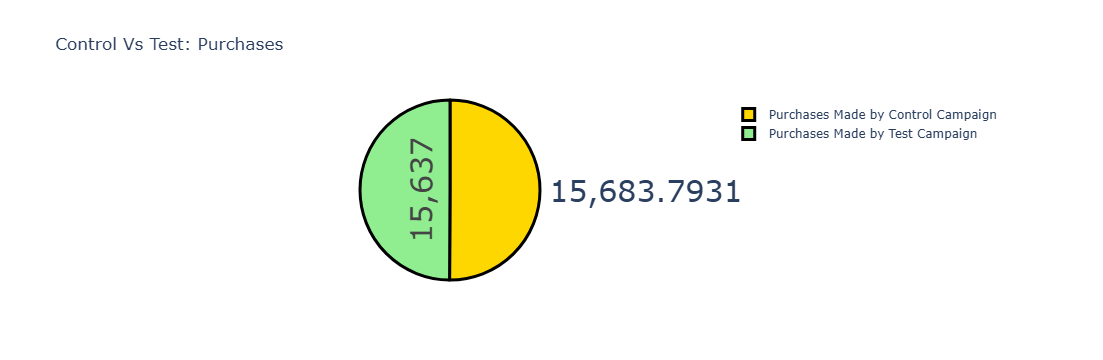

In [21]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

# There’s only a difference of around 1% in the purchases made from both ad campaigns. As the Control campaign resulted in more sales in less amount spent on marketing, the control campaign wins here!

# Now let’s analyze some metrics to find which ad campaign converts more. I will first look at the relationship between the number of website clicks and content viewed from both campaigns:

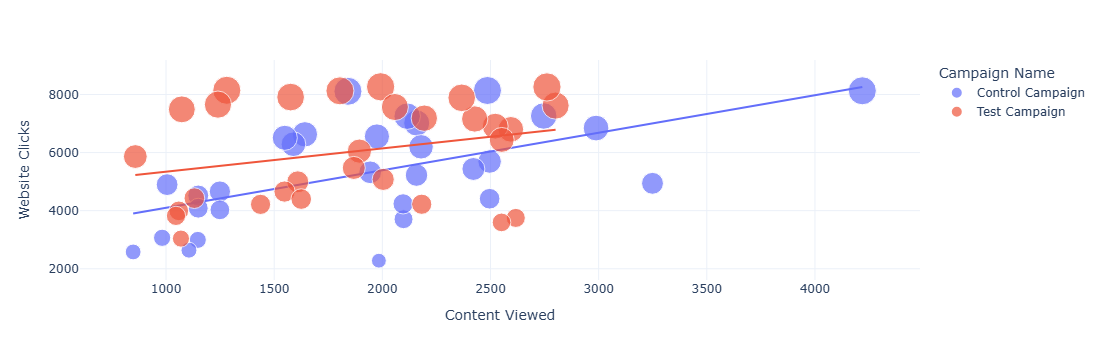

In [22]:
figure = px.scatter(data_frame = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

# The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

# The website clicks are higher in the test campaign, but the engagement from website clicks is higher in the control campaign. So the control campaign wins!

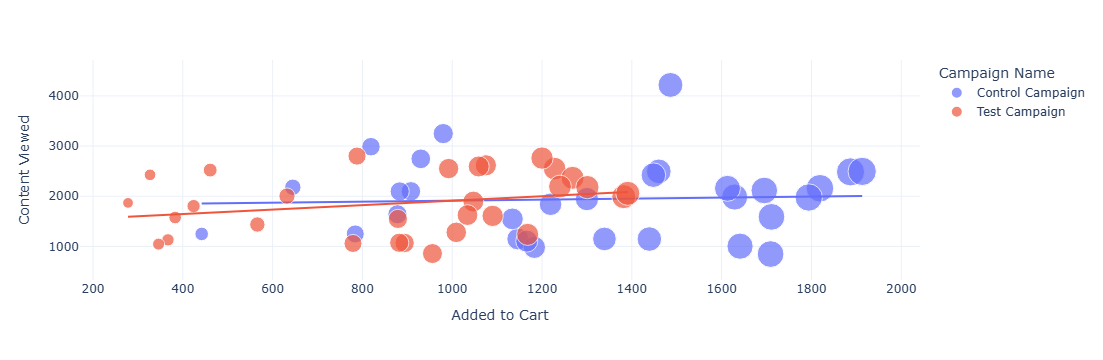

In [23]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

# Again, the control campaign wins! Now let’s have a look at the relationship between the number of products added to the cart and the number of sales from both campaigns:

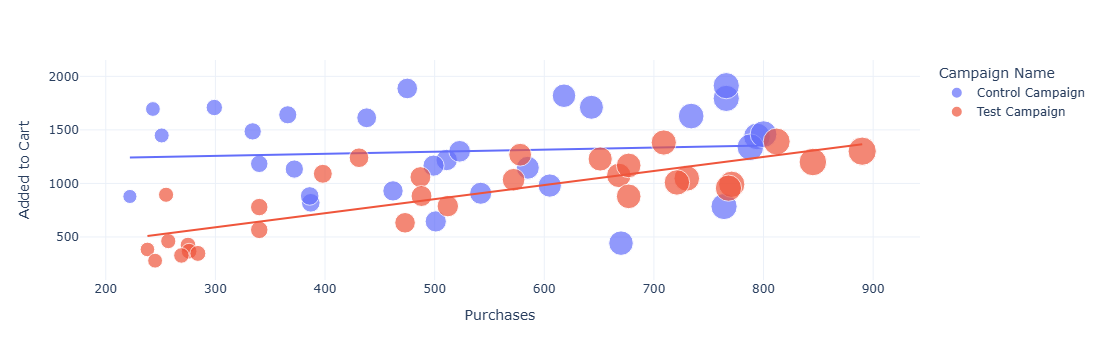

In [24]:
figure = px.scatter(data_frame = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

# Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher.



# Conclusion
From the above A/B tests, we found that the control campaign resulted in more sales and engagement from the visitors. More products were viewed from the control campaign, resulting in more products in the cart and more sales. But the conversation rate of products in the cart is higher in the test campaign. The test campaign resulted in more sales according to the products viewed and added to the cart. And the control campaign results in more sales overall. So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.